# TensorFlow Core tutorial

Canonical import statement for TensorFlow programs

In [1]:
import tensorflow as tf

You might think of TensorFlow Core programs as consisting of two discrete sections:

    1. Building the computational graph.
    2. Running the computational graph.

A computational graph is a series of TensorFlow operations arranged into a graph of nodes. Let's build a simple computational graph. Each node takes zero or more tensors as inputs and produces a tensor as an output. One type of node is a constant. Like all TensorFlow constants, it takes no inputs, and it outputs a value it stores internally. We can create two floating point Tensors `node1` and `node2` as follows:

In [2]:
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


Notice that printing the nodes does not output the values `3.0` and `4.0` as you might expect. Instead, they are nodes that, when evaluated, would produce 3.0 and 4.0, respectively. To actually evaluate the nodes, we must run the computational graph within a <b>session</b>. A session encapsulates the control and state of the TensorFlow runtime.

The following code creates a `Session` object and then invokes its `run` method to run enough of the computational graph to evaluate `node1` and `node2`. By running the computational graph in a session as follows:

In [3]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


We can build more complicated computations by combining `Tensor` nodes with operations <b>(Operations are also nodes)</b>. For example, we can add our two constant nodes and produce a new graph as follows:

In [4]:
node3 = tf.add(node1, node2)
print('node3:', node3)
print('sess.run(node3):', sess.run(node3))

node3: Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3): 7.0


Visualising graph for above code

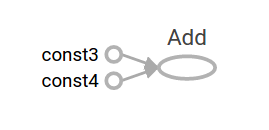

In [5]:
from PIL import Image
Image.open('tensorflow_graph1.png')

As it stands, this graph is not especially interesting because it always produces a constant result. A graph can be parameterized to accept external inputs, known as <b>placeholders</b>. A <b>placeholder</b> is a promise to provide a value later.

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # Shortcut for tf.add(a,b)
print(a)
print(b)
print(adder_node)

Tensor("Placeholder:0", dtype=float32)
Tensor("Placeholder_1:0", dtype=float32)
Tensor("add:0", dtype=float32)


We can evaluate this graph with multiple inputs by using the feed_dict argument to the run method to feed concrete values to the placeholders:

7.0
[ 4.  6.]


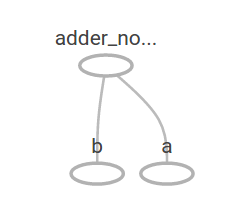

In [7]:
print(sess.run(adder_node, {a : 3, b : 4}))
print(sess.run(adder_node, {a : [1, 2], b : [3, 4]}))
Image.open('tensorflow_graph2.png')

We can make the computational graph more complex by adding another operation. For example,

21.0


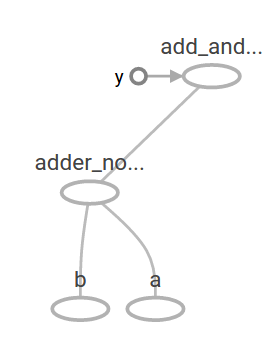

In [13]:
add_and_triple = adder_node * 3
print(sess.run(add_and_triple, {a:3, b:4}))
Image.open('tensorflow_graph3.png')

In machine learning we will typically want a model that can take arbitrary inputs, such as the one above. To make the model trainable, we need to be able to modify the graph to get new outputs with the same input. <b>Variables</b> allow us to add trainable parameters to a graph. They are constructed with a type and initial value:

In [12]:
W = tf.Variable([.3])
b = tf.Variable([-.3])
x = tf.placeholder(tf.float32)
linear_model = W*x + b
print(W)
print(b)
print(x)

<tf.Variable 'Variable_2:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>
Tensor("Placeholder_4:0", dtype=float32)


Constants are initialized when you call `tf.constant`, and their value can never change. By contrast, variables are not initialized when you call `tf.Variable`. To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

In [13]:
init = tf.global_variables_initializer()
sess.run(init)

It is important to realize `init` is a handle to the TensorFlow sub-graph that initializes all the global variables. Until we call `sess.run`, the variables are uninitialized.

In [14]:
x_train = [1, 2, 3, 4]
y_train = [-0, -1, -2, -3]
print(sess.run(linear_model, {x: x_train}))

[ 0.          0.30000001  0.60000002  0.90000004]


We've created a model, but we don't know how good it is yet. To evaluate the model on training data, we need a `y` placeholder to provide the desired values, and we need to write a loss function.

In [16]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x: x_train, y: y_train}))

23.66


A variable is initialized to the value provided to `tf.Variable` but can be changed using operations like `tf.assign`. Here, `W=-1` and `b=1` are the optimal parameters for our model. We can change `W` and `b` accordingly:

In [30]:
fixW = tf.assign(W, [-1])
fixb = tf.assign(b, [1])
sess.run([fixW, fixb])
print(sess.run(loss, {x: x_train, y: y_train}))

0.0


# tf.train API

TensorFlow provides <b>optimizers</b> that slowly change each variable in order to minimize the loss function. The simplest optimizer is <b>gradient descent</b>.

In [17]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
sess.run(init) # Reset values to incorrect assumptions
for i in range(1000):
    sess.run(train,{x: x_train, y:y_train})
print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


Evaluating training accuracy

In [18]:
new_W, new_b, new_loss = sess.run([W, b, loss], {x: x_train, y:y_train})
print('new_W: ',new_W)
print('new_b: ', new_b)
print('new_loss: ', new_loss)

new_W:  [-0.9999969]
new_b:  [ 0.99999082]
new_loss:  5.69997e-11


# Complete program

The completed trainable linear regression model is shown here:

In [19]:
import tensorflow as tf

# Model parameters
W = tf.Variable([.3])
b = tf.Variable([-.3])
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss function (sse)
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    sess.run(train, {x: x_train, y: y_train})
    
# Evaluating training accuracy
new_W, new_b, new_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print('new_W: {}, new_b: {}, new_loss: {}'.format(new_W, new_b, new_loss))

new_W: [-0.9999969], new_b: [ 0.99999082], new_loss: 5.699973826267524e-11


# tf.estimator

`tf.estimator` is a high-level TensorFlow library that simplifies the mechanics of machine learning, including the following:

    1. running training loops
    2. running evaluation loops
    3. managing data sets

tf.estimator defines many common models. We use `LinearRegressor` as one of the model for above program.

In [20]:
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np
import tensorflow as tf

# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# We can invoke 1000 training steps by invoking the  method and passing the
# training data set.
estimator.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f18fd55e240>, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_log_step_count_steps': 100, '_service': None, '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_task_id': 0, '_num_ps_replicas': 0, '_master': '', '_evaluation_master': '', '_model_dir': '/tmp/tmpkn7l8je4', '_session_config': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpkn7l8je4/model.ckpt.
INFO:tensorflow:step = 1, loss = 10.0
INFO:tensorflow:global_step/sec: 963.364
INFO:tensorflow:step = 101, loss = 0.167141 (0.104 sec)
INFO:tensorflow:global_step/sec: 878.101
INFO:tensorflow:step = 201, loss = 0.0108196 (0.114 sec)
INFO:tensorflow:global_step/sec: 841.166
IN

# A custom model